In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [5]:
cols = [
    "age",        # age in years
    "sex",        # sex (1 = male, 0 = female)
    "cp",         # chest pain type
    "trestbps",   # resting blood pressure
    "chol",       # serum cholesterol
    "fbs",        # fasting blood sugar > 120 mg/dl
    "restecg",    # resting electrocardiographic results
    "thalach",    # maximum heart rate achieved
    "exang",      # exercise-induced angina
    "oldpeak",    # ST depression induced by exercise
    "slope",      # slope of the peak exercise ST segment
    "ca",         # number of major vessels (0–3) colored by fluoroscopy
    "thal",       # thalassemia
    "num",        # diagnosis of heart disease (target)
]

df = pd.read_csv("../data/processed.cleveland.data", sep=",", names=cols)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


It is noticed that there are strings in columns "ca" and "thal". Hence we need to replace them as NaN's before proceeding. Also, columns such as "sex", "cp" are categorical in nature, while it is interpreted as numeric (float64) by pandas. Hence, redefining the data types of numeric and categorical accordingly.

Also, the target column has 5 different classes for different stages of Heart Disease, hence converting it to a binary target.

In [ ]:
NUMERIC_COLS = [
    "age", "trestbps", "chol", "thalach", "oldpeak"
]

CATEGORICAL_COLS = [
    "sex", "cp", "fbs", "restecg", "exang",
    "slope", "ca", "thal"
]

In [17]:
df.replace("?", np.nan, inplace=True)

In [34]:
# Converting data type of numeric and categorical columns explicitly

df[NUMERIC_COLS] = df[NUMERIC_COLS].astype(float)
for col in CATEGORICAL_COLS:
    df[col] = df[col].astype("category")

# Defining the target column
df.rename(columns={"num": "target"}, inplace=True)
df["target"] = df["target"].astype(int)

# Converting target to binary classification
df["target"] = (df["target"] > 0).astype(int)

In [35]:
df.dtypes

age          float64
sex         category
cp          category
trestbps     float64
chol         float64
fbs         category
restecg     category
thalach      float64
exang       category
oldpeak      float64
slope       category
ca          category
thal        category
target         int64
dtype: object

In [36]:
df.describe()

,age,trestbps,chol,thalach,oldpeak,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,131.689769,246.693069,149.607261,1.039604,0.458746
std,9.038662,17.599748,51.776918,22.875003,1.161075,0.499120
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.000000
25%,48.000000,120.000000,211.000000,133.500000,0.000000,0.000000
50%,56.000000,130.000000,241.000000,153.000000,0.800000,0.000000
75%,61.000000,140.000000,275.000000,166.000000,1.600000,1.000000
max,77.000000,200.000000,564.000000,202.000000,6.200000,1.000000


In [37]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

### EDA for NUMERIC columns

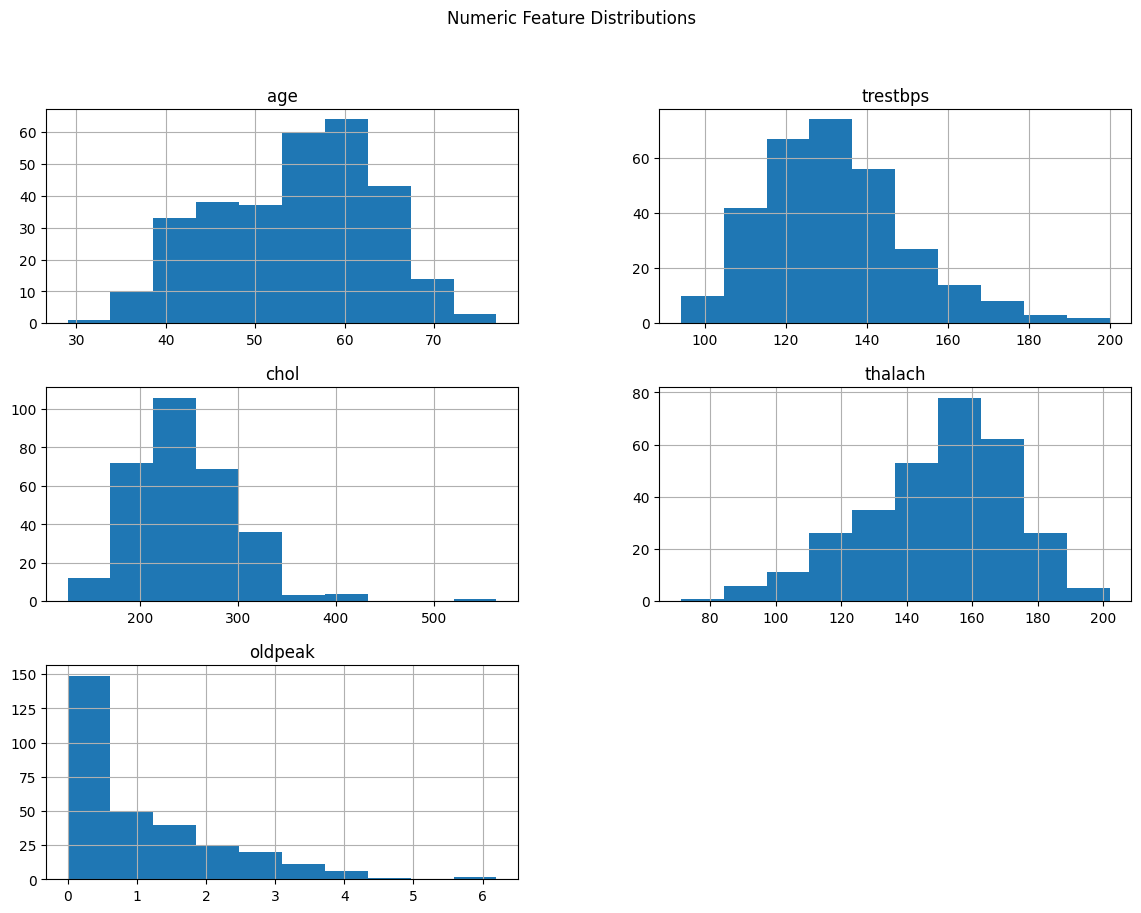

In [38]:
# Histograms

df[NUMERIC_COLS].hist(figsize=(14, 10))
plt.suptitle("Numeric Feature Distributions")
plt.show()

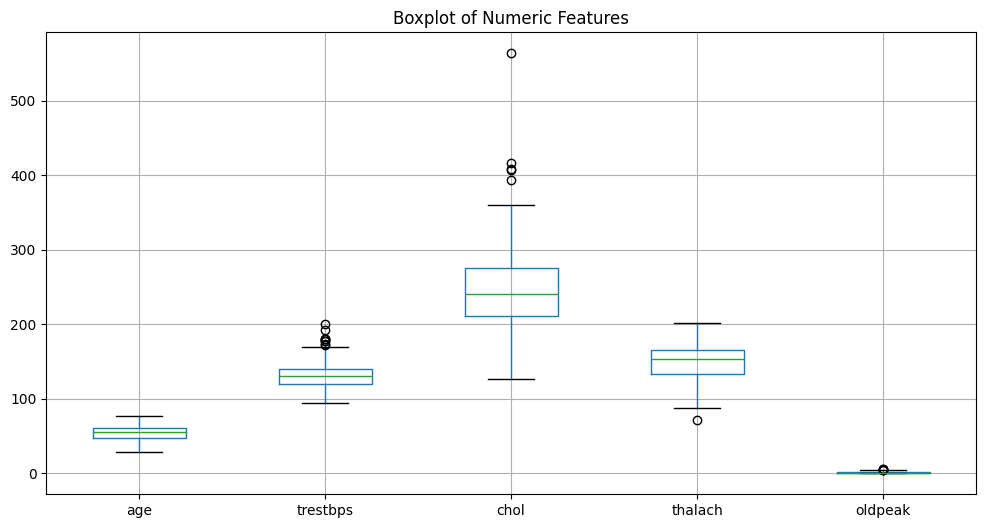

In [39]:
# Boxplots (Outlier Detection)

plt.figure(figsize=(12,6))
df[NUMERIC_COLS].boxplot()
plt.title("Boxplot of Numeric Features")
plt.show()

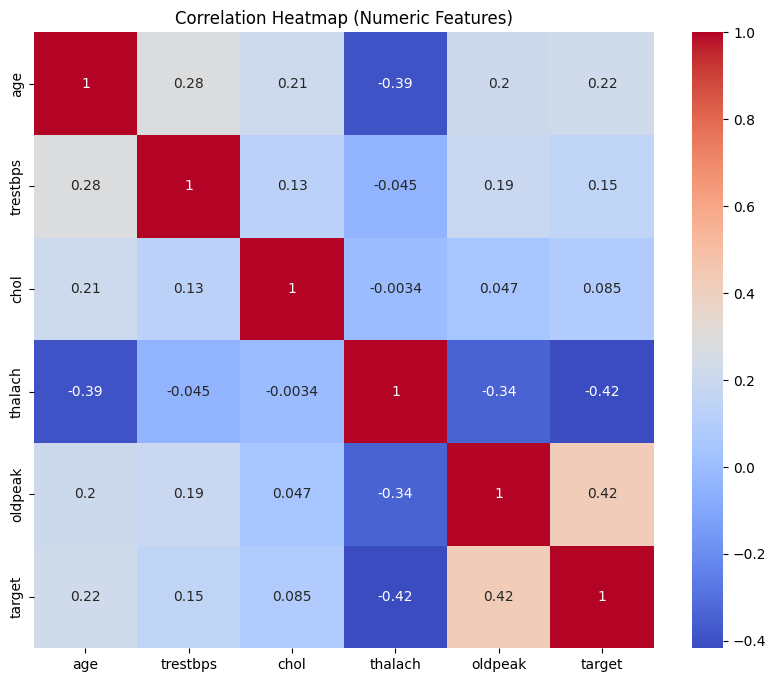

In [40]:
# Correlation Heatmap (NUMERIC ONLY)

plt.figure(figsize=(10,8))
sns.heatmap(df[NUMERIC_COLS + ["target"]].corr(),
            cmap="coolwarm",
            annot=True)
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()

### EDA for Categorical Columns

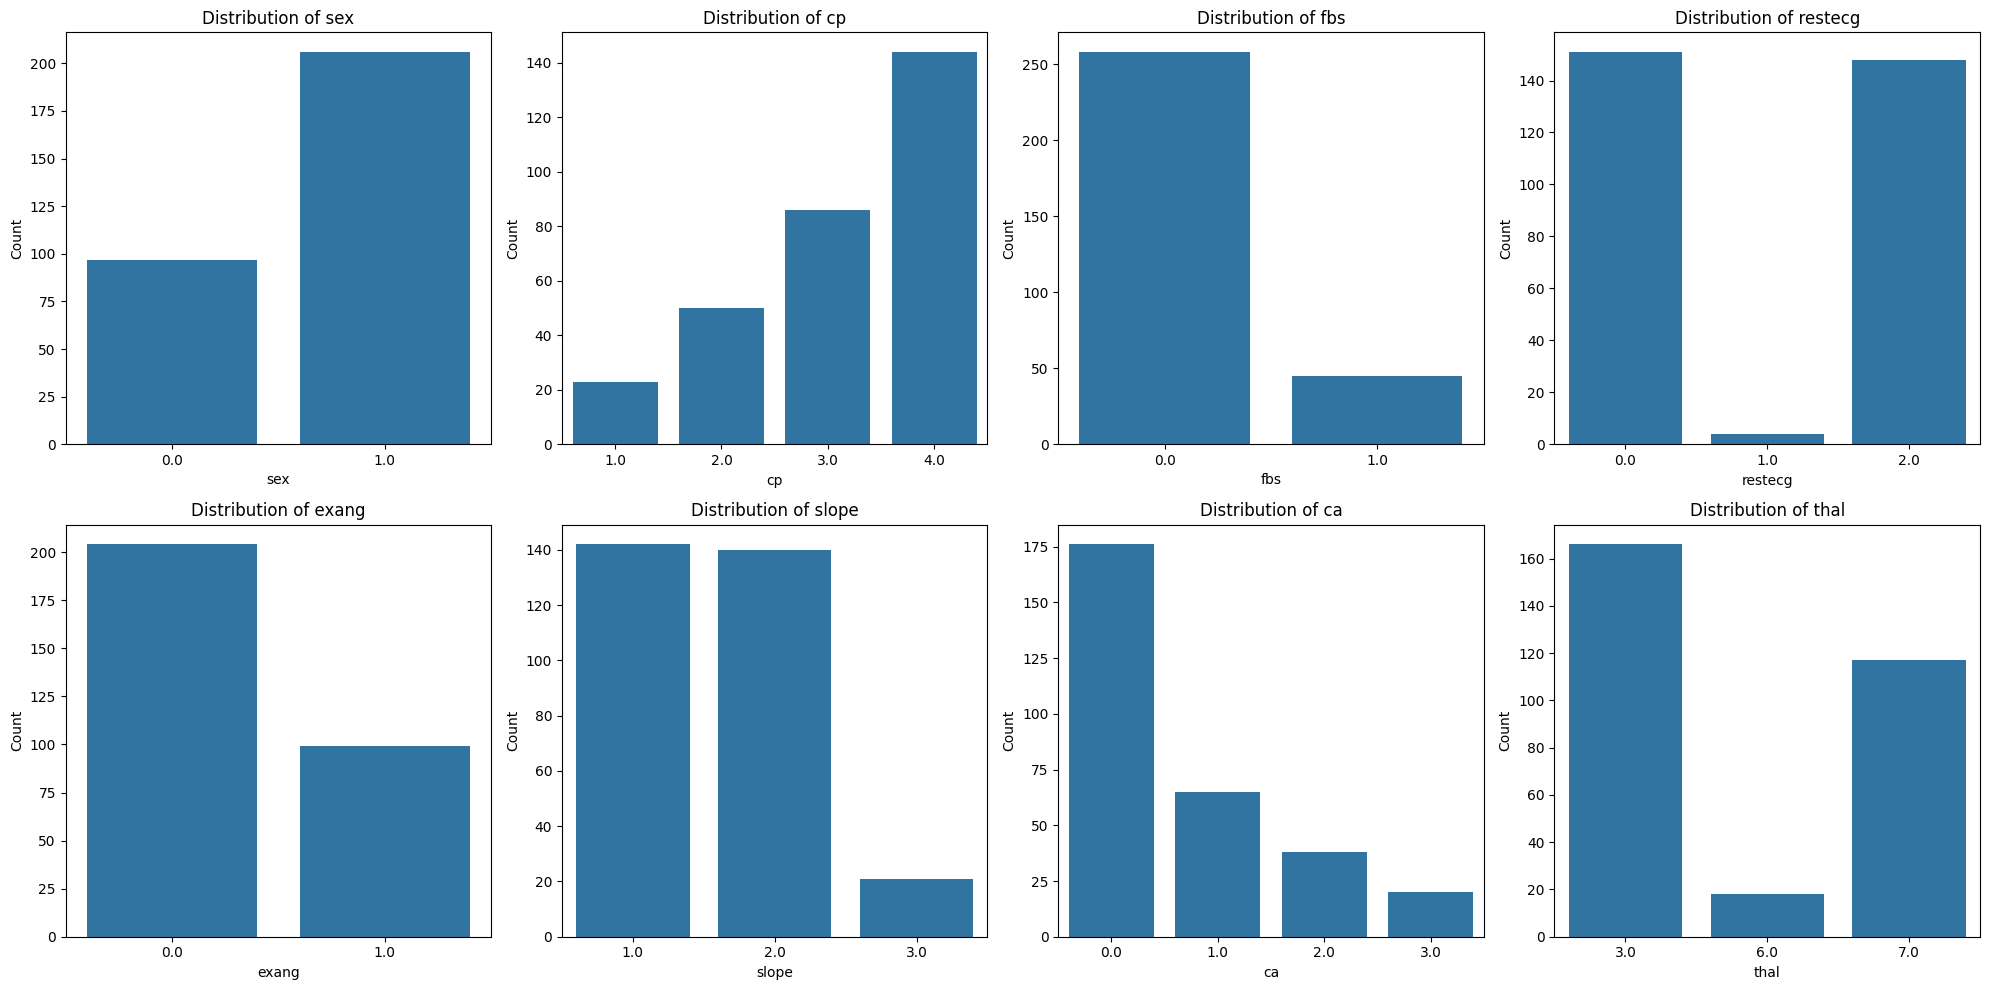

In [47]:
# Count plots

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.ravel()

for i, col in enumerate(CATEGORICAL_COLS):
    sns.countplot(x=col, data=df, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")

plt.tight_layout()
plt.show()

### Class Balance

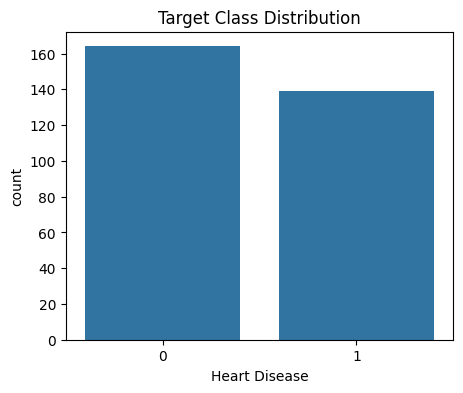

In [42]:
plt.figure(figsize=(5,4))
sns.countplot(x="target", data=df)
plt.title("Target Class Distribution")
plt.xlabel("Heart Disease")
plt.show()

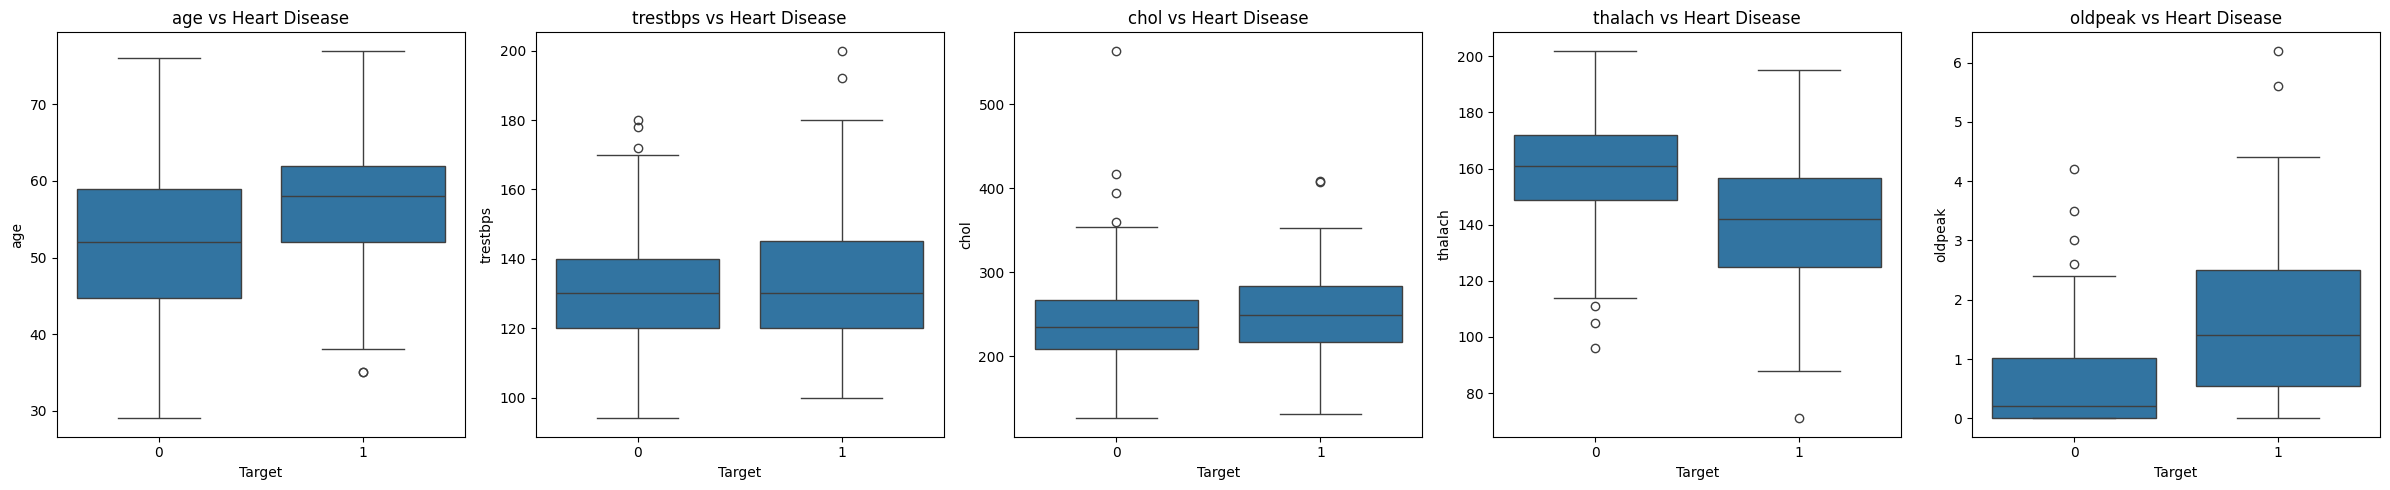

In [46]:
# Numeric Vs Target (Example of bivariate analysis)

fig, axes = plt.subplots(1, 5, figsize=(24, 5), sharey=False)

for i, col in enumerate(NUMERIC_COLS):
    sns.boxplot(x="target", y=col, data=df, ax=axes[i])
    axes[i].set_title(f"{col} vs Heart Disease")
    axes[i].set_xlabel("Target")
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()

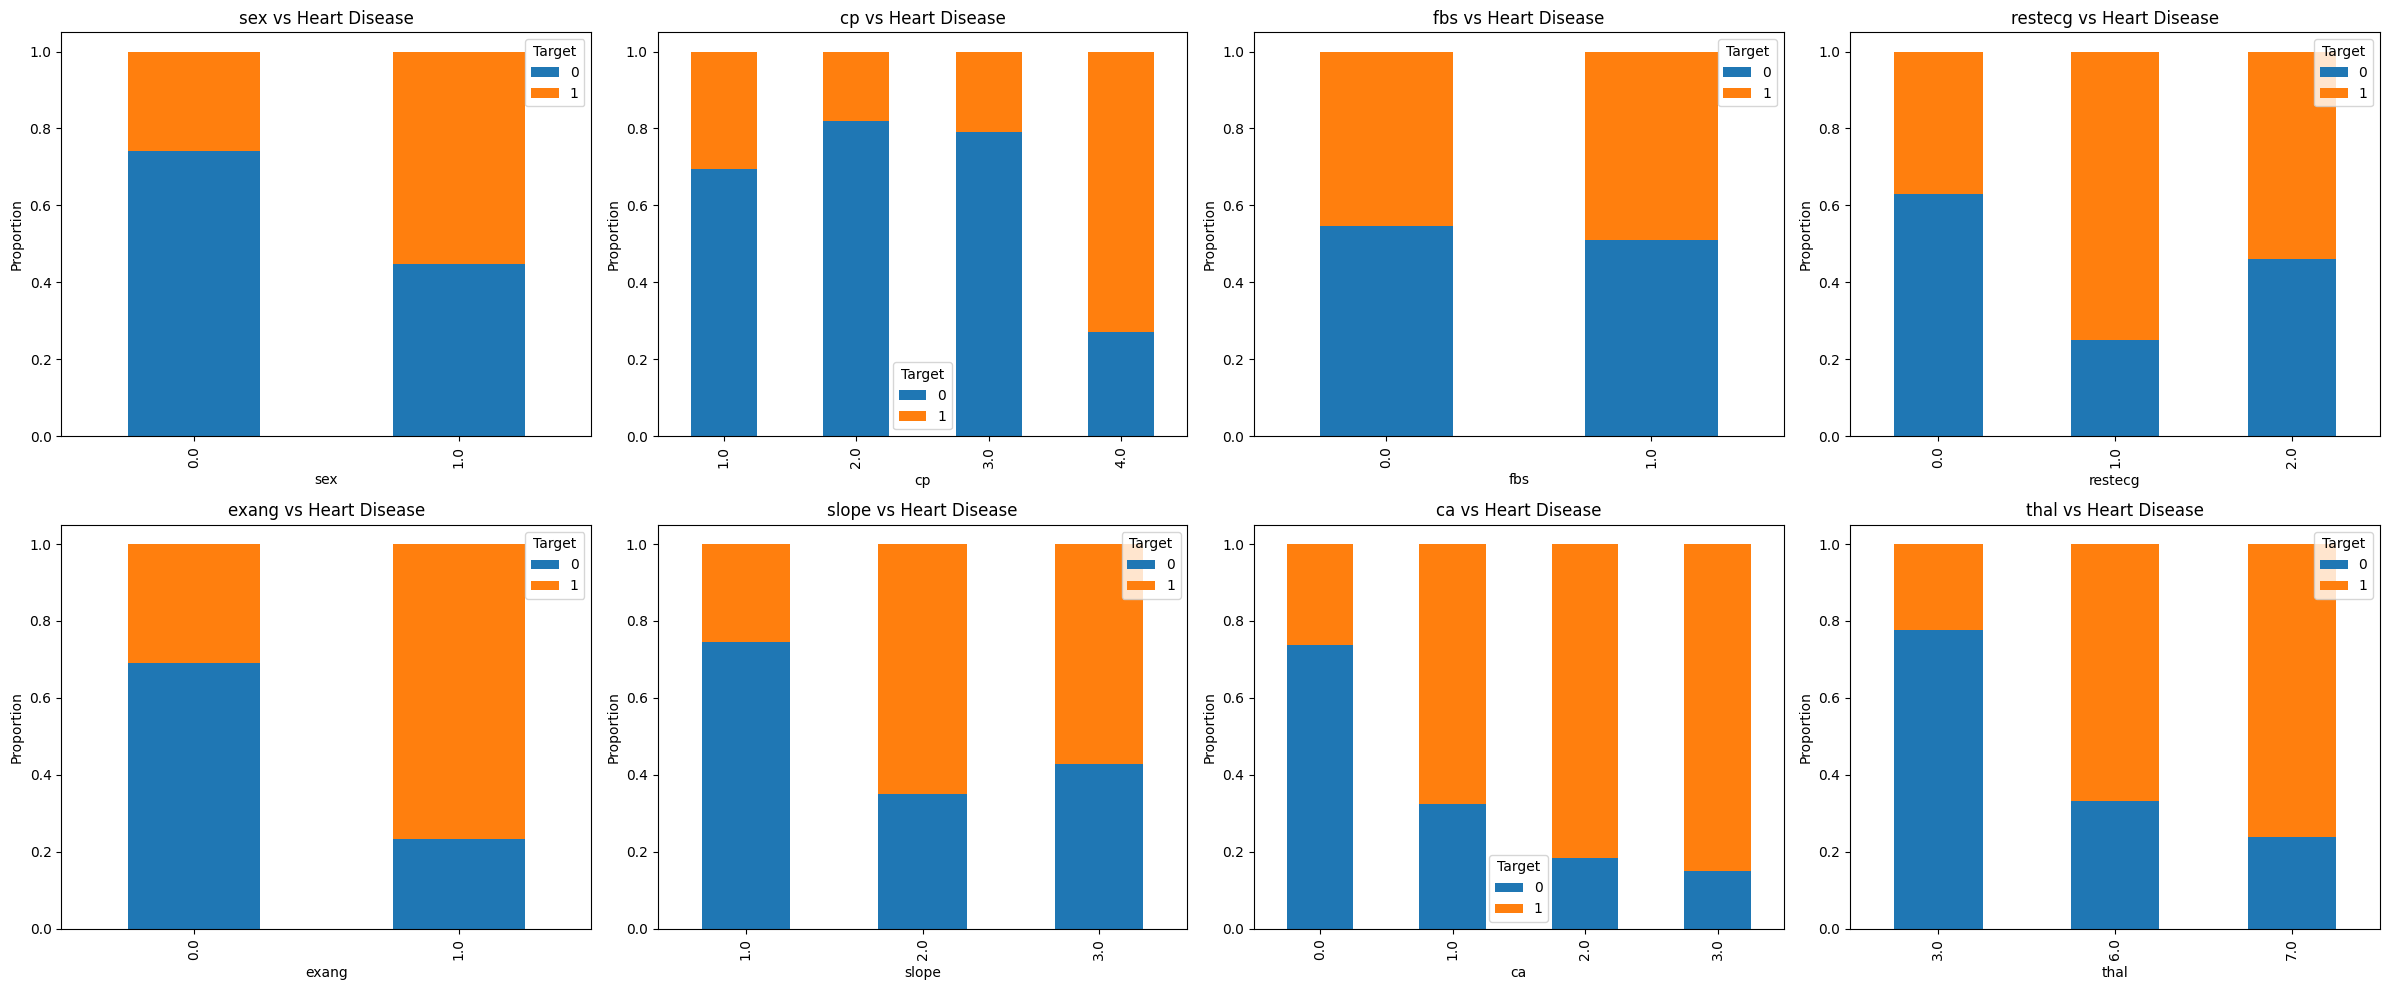

In [ ]:
# Categorical Vs Target

fig, axes = plt.subplots(2, 4, figsize=(24, 10))
axes = axes.ravel()  # Flatten to 1D array for easy indexing

for i, col in enumerate(CATEGORICAL_COLS):
    ct = pd.crosstab(df[col], df["target"], normalize="index")
    ct.plot(kind="bar", stacked=True, ax=axes[i])
    axes[i].set_title(f"{col} vs Heart Disease")
    axes[i].set_ylabel("Proportion")
    axes[i].legend(title="Target")

plt.tight_layout()
plt.show()

### Key EDA Observations

- Numeric features such as age, cholesterol, and maximum heart rate show distinct distributions across target classes.
- Categorical features like chest pain type and thalassemia exhibit strong association with heart disease presence.
- No severe class imbalance is observed in the target variable.
- Feature distributions and correlations support the use of both linear and non-linear models.

In [48]:
df.to_csv("../data/processed/heart.csv", index=False)